<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

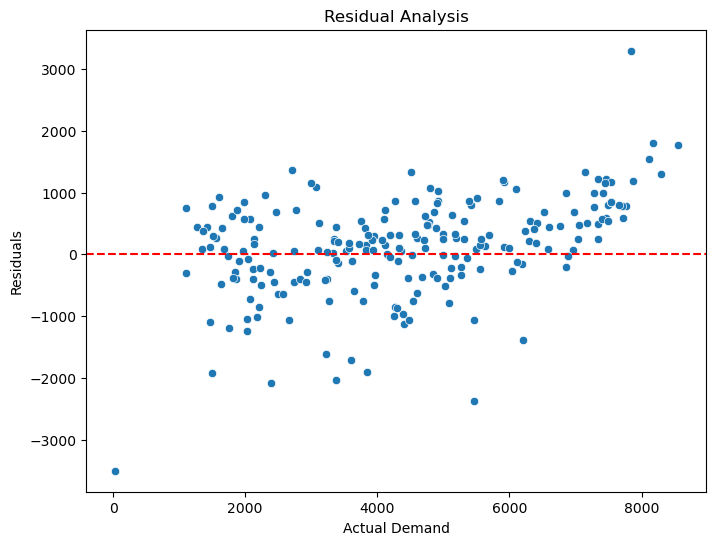

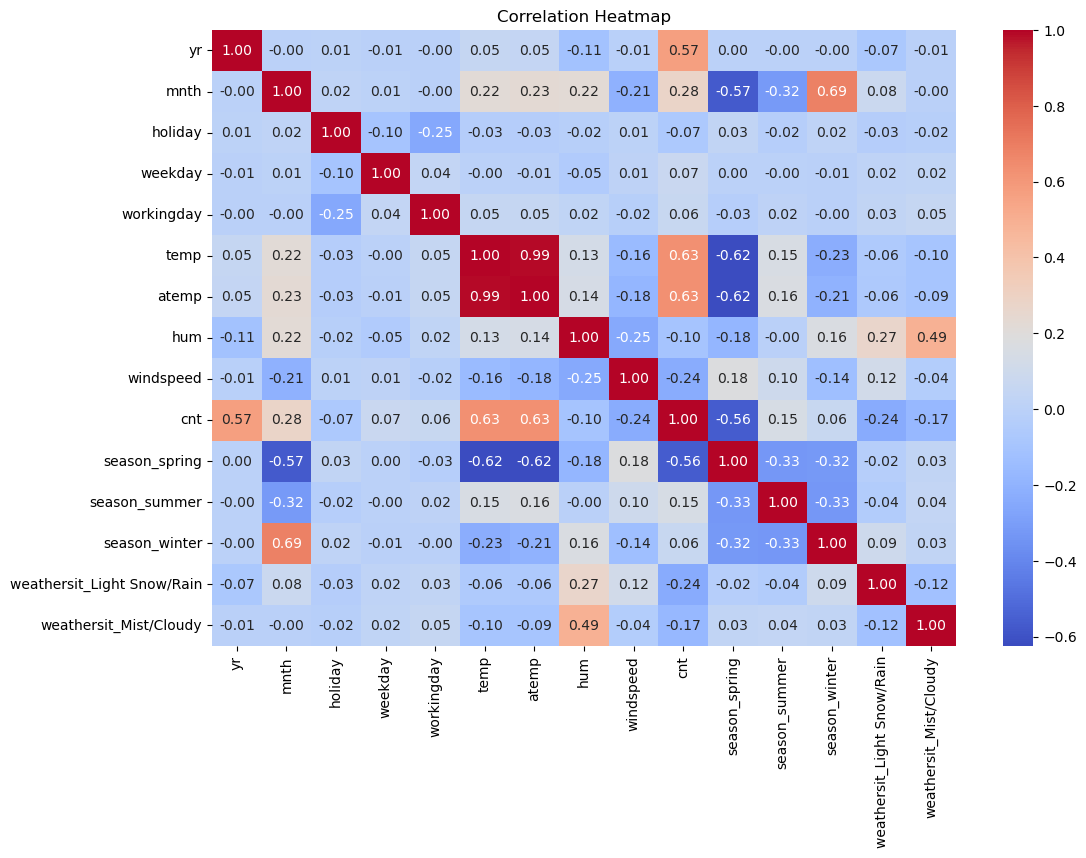

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading Dataset
data = pd.read_csv("day.csv")

#null values and data info is displayed
print(data.info())
print(data.isnull().sum())

# Mapping the categorical variables
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weather_map = {
    1: 'Clear/Partly Cloudy', 
    2: 'Mist/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
}
data['season'] = data['season'].map(season_map)
data['weathersit'] = data['weathersit'].map(weather_map)

# Creating dummy variables for categorical features
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

# Dropping irrelevant columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
data.drop(columns=columns_to_drop, inplace=True)

# Splitting Data into Features and Target
X = data.drop(columns=['cnt'])
y = data['cnt']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Predictions
y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", r2)

# Coefficients and Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# Visualizing Results
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Demand")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
